# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv(r'C:\Users\dell\Desktop\projects\diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
df.shape

(100000, 9)

In [6]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [7]:
len(df.columns)

9

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [11]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [12]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [15]:
df.gender.replace(['Female','Male','Other'],[0,1,2])

0        0
1        0
2        1
3        0
4        1
        ..
99995    0
99996    0
99997    1
99998    0
99999    0
Name: gender, Length: 100000, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
newdf=df.copy()
enc=LabelEncoder()
newdf.gender

0        Female
1        Female
2          Male
3        Female
4          Male
          ...  
99995    Female
99996    Female
99997      Male
99998    Female
99999    Female
Name: gender, Length: 100000, dtype: object

In [17]:
newdf.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [18]:
newdf.gender= enc.fit_transform(newdf.gender)

In [19]:
newdf.gender.unique()

array([0, 1, 2])

In [20]:
newdf.shape

(100000, 9)

In [21]:
df.gender = enc.fit_transform(df.gender)
df.smoking_history= enc.fit_transform(df.smoking_history)
df.diabetes = enc.fit_transform(df.diabetes)

In [22]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [23]:
df.dtypes

gender                   int32
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int32
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [24]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,2.179650,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.889659,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,4.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [25]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


<AxesSubplot:>

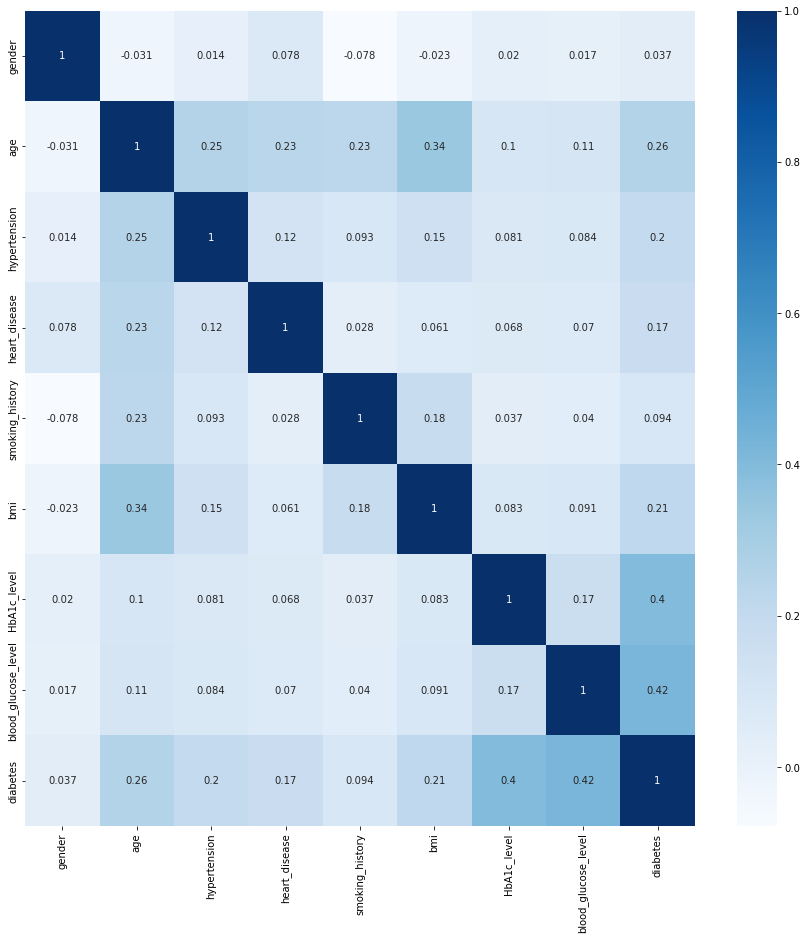

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True, cmap='Blues')

<Figure size 1080x1080 with 0 Axes>

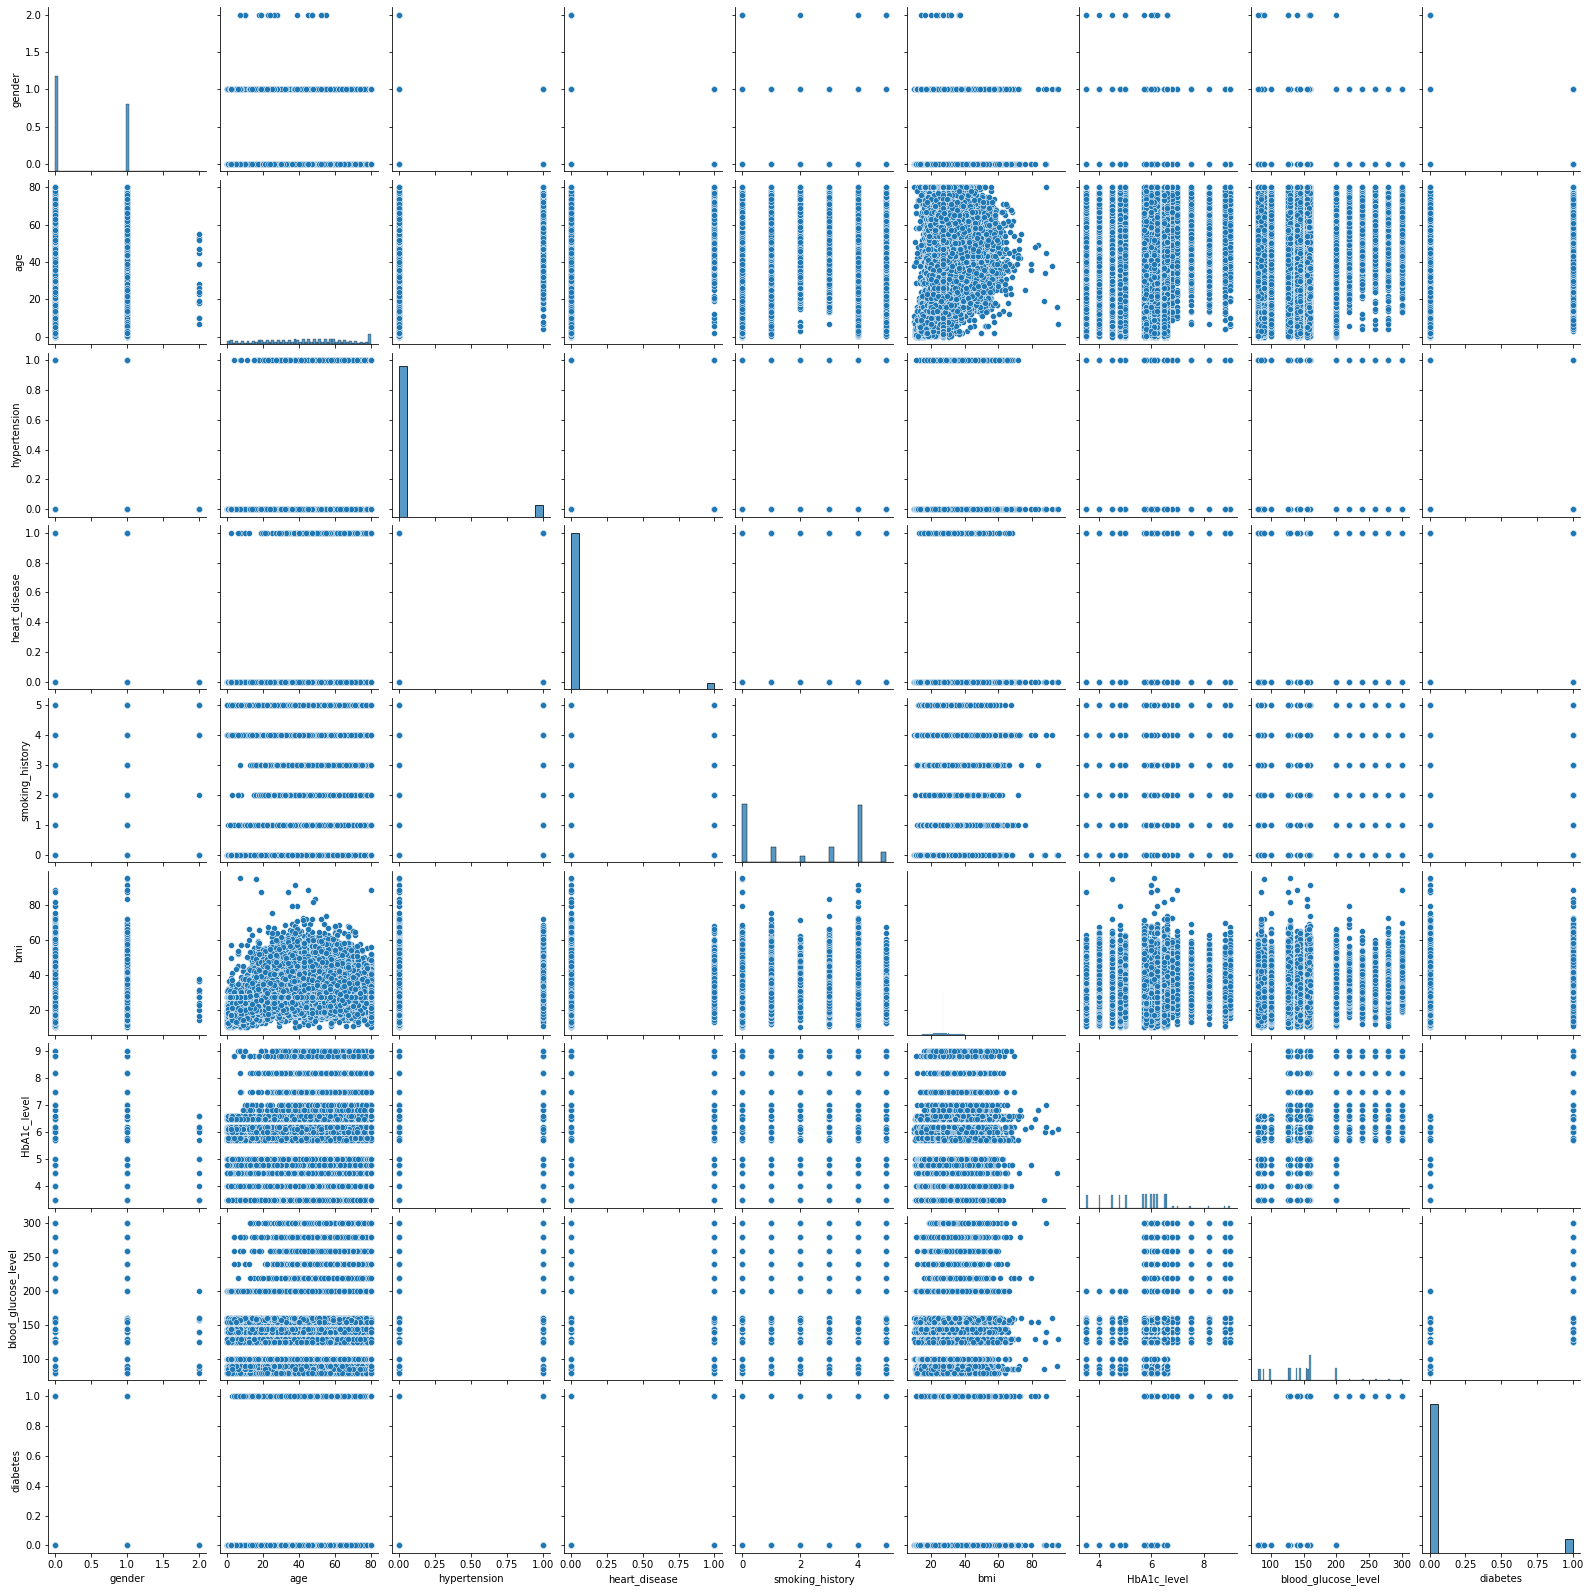

In [27]:
plt.figure(figsize=(15,15))
sns.pairplot(df)

<AxesSubplot:>

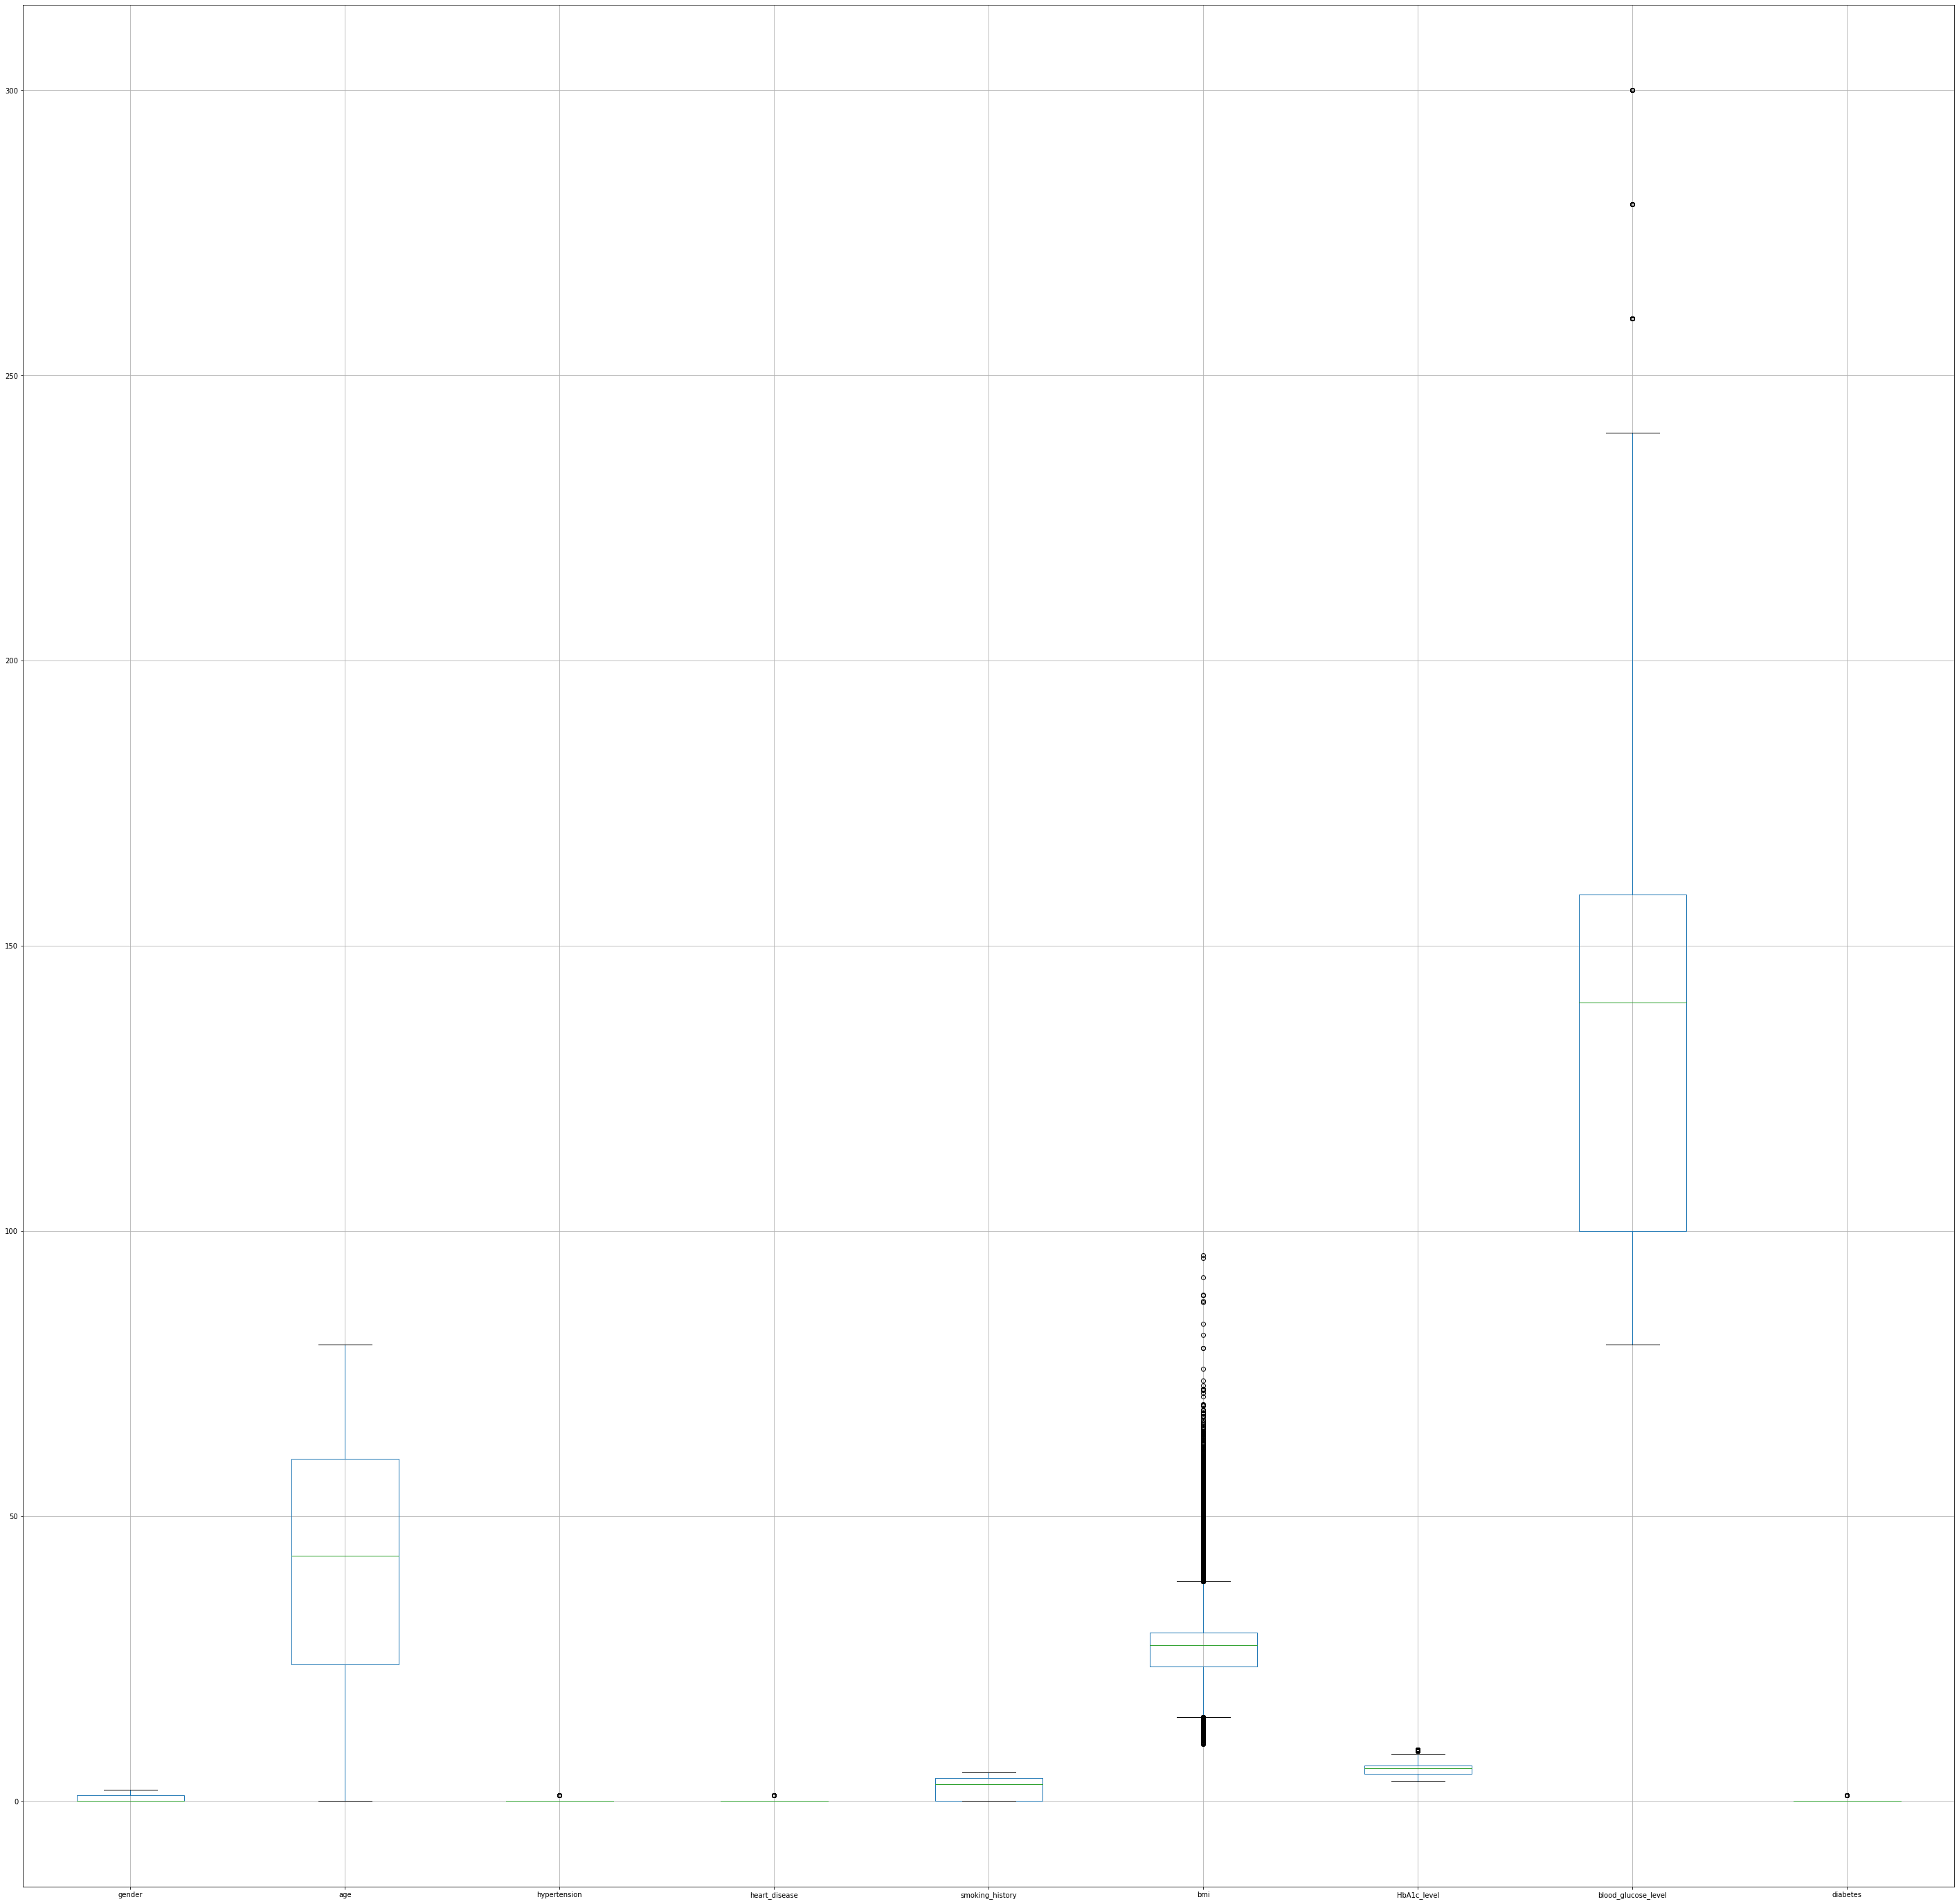

In [28]:
plt.figure(figsize=(50,50))
df.boxplot()

# Machine Learning 

In [29]:
model= LinearRegression()

### Defining The Independent and  Dependent Variable

In [30]:
df.head(1)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0


In [31]:
x= df.drop('diabetes', axis=1)
y= df.diabetes

In [32]:
x.ndim

2

In [33]:
y.ndim

1

In [34]:
x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [35]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

## Train Test Split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,x,test_size=0.2,random_state=42)

In [37]:
len(x_train)

80000

In [38]:
len(x_test)

20000

In [39]:
len(y_train)

80000

In [40]:
len(y_test)

20000

## Training the model

In [41]:
model.fit(x_train,y_train)

LinearRegression()

In [42]:
#   y= mx+c
#   model.coef_ => m
#   model.intercept_ =>c

In [43]:
model.coef_

array([[ 1.00000000e+00, -8.22043874e-17, -8.34155453e-17,
        -4.97648075e-17,  6.85872616e-17, -2.23853841e-18,
        -1.56183920e-16,  2.47867605e-17],
       [ 9.72142371e-17,  1.00000000e+00, -2.94622671e-14,
         2.77660390e-15, -2.00662487e-16, -1.93452467e-16,
        -1.76453771e-17, -1.22384252e-16],
       [-4.54550008e-15, -5.61955206e-17,  1.00000000e+00,
        -1.92832529e-16, -2.05119575e-16,  2.87659316e-17,
         6.43683297e-16, -3.27631208e-16],
       [-4.05328548e-16, -9.19040778e-18,  2.30376039e-15,
         1.00000000e+00, -7.07892498e-17,  1.24771908e-16,
        -1.62008973e-16, -1.24771329e-17],
       [ 5.63135504e-15, -1.62202265e-16, -9.84636764e-15,
        -4.09634020e-15,  1.00000000e+00,  2.73712978e-16,
        -2.71162880e-16,  7.92291873e-17],
       [-1.74393739e-15, -1.98988546e-16, -8.04424907e-15,
         1.01150701e-15,  9.14110342e-16,  1.00000000e+00,
        -1.38952982e-16, -2.07983732e-17],
       [ 2.73245085e-16,  1.920630

In [44]:
model.intercept_

array([-8.54871729e-15,  2.13162821e-14,  4.55330218e-14, -2.01227923e-16,
       -1.42108547e-14,  2.48689958e-14, -4.44089210e-15,  0.00000000e+00])

# Testing The Model

In [45]:
y_pred = model.predict(x_test)

In [46]:
y_pred

array([[-7.44671561e-15,  1.30000000e+01,  7.85321762e-15, ...,
         2.08200000e+01,  5.80000000e+00,  1.26000000e+02],
       [-6.02917909e-15,  3.00000000e+00,  1.68041110e-15, ...,
         2.10000000e+01,  5.00000000e+00,  1.45000000e+02],
       [ 1.00000000e+00,  6.30000000e+01, -2.57131515e-14, ...,
         2.53200000e+01,  3.50000000e+00,  2.00000000e+02],
       ...,
       [-1.06327336e-14,  4.90000000e+01,  1.30481068e-14, ...,
         2.65100000e+01,  4.80000000e+00,  1.00000000e+02],
       [ 1.00000000e+00,  7.30000000e+01,  8.96349037e-15, ...,
         2.73200000e+01,  6.60000000e+00,  1.00000000e+02],
       [-9.17435490e-15,  4.30000000e+01, -7.90670827e-16, ...,
         2.38600000e+01,  5.80000000e+00,  1.45000000e+02]])

In [47]:
newdf = pd.DataFrame({
     "Actual value": y_test,
    "Predicted value": y_pred
})

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
newdf.head(10)


# Performance

In [ ]:
r2_score(y_test,y_pred)